In [22]:
import matplotlib.pyplot as plt
import numpy as np
import math

RANGE = 10
REFINEMENT = 100

Defining systems, unit impulse, and ramp functions 

In [23]:
#ramp function
def r(t):
    if t < 0:
        return 0
    else:
        return t

#unit impulse function
def d(t):
    if t == 0:
        return 1
    else:
        return 0

#system 1
def y1(t, a, T):
    return np.sinh(np.abs(a*r(t-T)))

#system 2
def y2(t, a, T):
    return 2*t*a*r((t-T)/2)

#system 3
def y3(t, a, T):
    if t-T == 0:
        return a*r(9999999999999)
    else:
        return a*r(1/(t-T))



Defining linearity and time invariance tests (superposition/scaling & time shifting respectively)

In [24]:
#scaling function. equivalent to superposition test e.g. 2x = x + x -> 2y
def scaling(f):
    outputs = []
    for i in range(2*RANGE):
        output = []
        for j in range(2*RANGE*REFINEMENT):
            output.append(i*f((j-RANGE*REFINEMENT)/REFINEMENT, 1, 0))
        outputs.append(output)
    return outputs

#scale input
def scalingi(f):
    outputs = []
    for i in range(2*RANGE):
        output = []
        for j in range(2*RANGE*REFINEMENT):
            output.append(f((j-RANGE*REFINEMENT)/REFINEMENT, i, 0))
        outputs.append(output)
    return outputs

#time invariance output
def time_invariance(f):
    outputs = []
    for i in range(2*RANGE):
        output = []
        for j in range(2*RANGE*REFINEMENT):
            output.append(f((j-RANGE*REFINEMENT)/REFINEMENT -i, 1, 0))
        outputs.append(output)
    return outputs

#time invariance input
def time_invariancei(f):
    outputs = []
    for i in range(2*RANGE):
        output = []
        for j in range(2*RANGE*REFINEMENT):
            output.append(f((j-RANGE*REFINEMENT)/REFINEMENT, 1, i))
        outputs.append(output)
    return outputs


Defining time axis

In [25]:
ytime = [(i-RANGE*REFINEMENT)/REFINEMENT for i in range(2*RANGE*REFINEMENT)]

Linearity & time invariance tests system 1

System 1 is causal, y(-1) = 0 


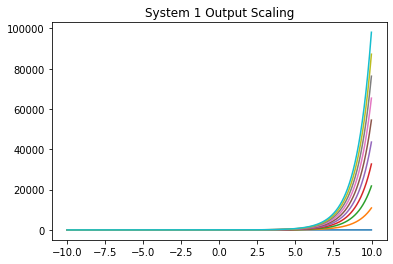

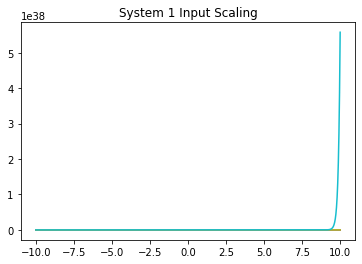

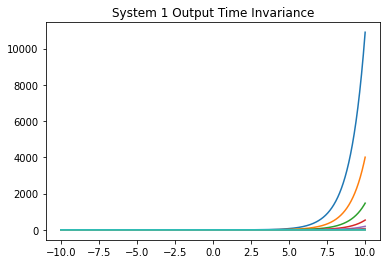

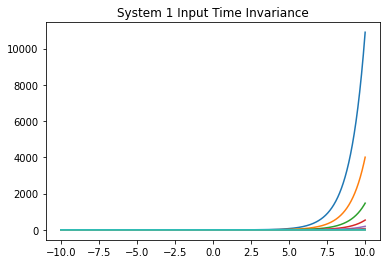

In [26]:
y1s = scaling(y1)
plt.figure()
plt.title("System 1 Output Scaling")
for i in range(RANGE):
    plt.plot(ytime, y1s[i])

y1si = scalingi(y1)
plt.figure()
plt.title("System 1 Input Scaling")
for i in range(RANGE):
    plt.plot(ytime, y1si[i])

y1t = time_invariance(y1)
plt.figure()
plt.title("System 1 Output Time Invariance")
for i in range(RANGE):
    plt.plot(ytime, y1t[i])

y1ti = time_invariancei(y1)
plt.figure()
plt.title("System 1 Input Time Invariance")
for i in range(RANGE):
    plt.plot(ytime, y1ti[i])

#causality test
if y1c(-1) == 0:
    print("System 1 is causal, y(-1) = 0 ")
else:
    print("System 1 is not causal")


<p>because the output and input scaling graphs do not match, system 1 is non-linear.</p>
<p>because the output and input time invariance graphs match, system 1 is time invariant</p>
<p>because no system references future time indices, the system is causal. (note zero values of ramp response for t less than zero)</p>


Linearity & time invariance tests system 2

System 2 is causal, y(-1) = 0 


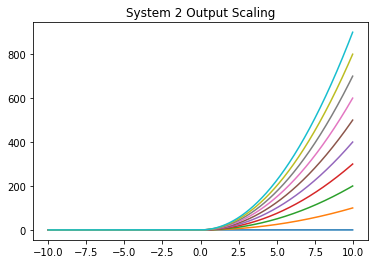

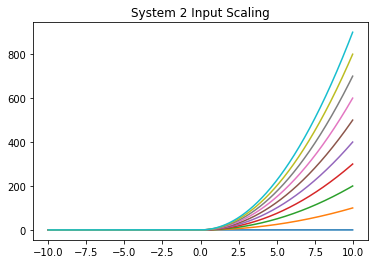

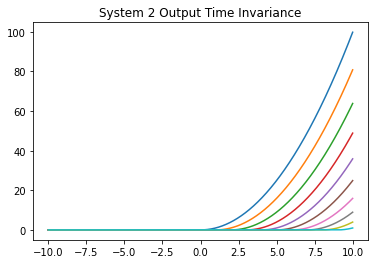

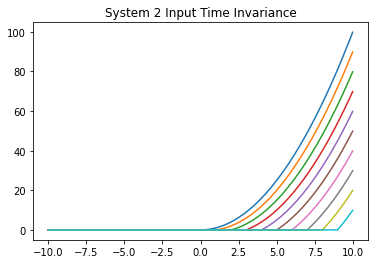

In [27]:
y2s = scaling(y2)
plt.figure()
plt.title("System 2 Output Scaling")
for i in range(RANGE):
    plt.plot(ytime, y2s[i])

y2si = scalingi(y2)
plt.figure()
plt.title("System 2 Input Scaling")
for i in range(RANGE):
    plt.plot(ytime, y2si[i])

y2t = time_invariance(y2)
plt.figure()
plt.title("System 2 Output Time Invariance")
for i in range(RANGE):
    plt.plot(ytime, y2t[i])

y2ti = time_invariancei(y2)
plt.figure()
plt.title("System 2 Input Time Invariance")
for i in range(RANGE):
    plt.plot(ytime, y2ti[i])

#causality test
if y2c(-1) == 0:
    print("System 2 is causal, y(-1) = 0 ")
else:
    print("System 2 is not causal")


<p>because the output and input scaling graphs match, system 2 is linear. </p>
<p>because the output and input time invariance graphs do not match, system 2 is time variant</p>
<p>because no system references future time indices, the system is causal. (note zero values of ramp response for t less than zero)</p>


Linearity & time invariance tests system 3

System 3 is causal, y(-1) = 0 


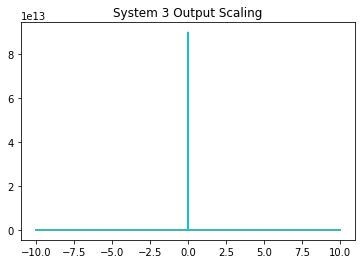

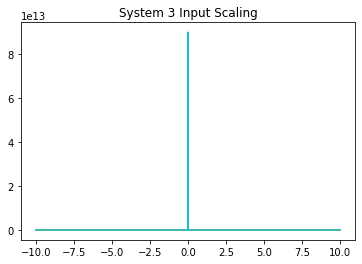

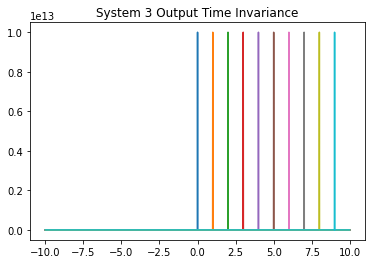

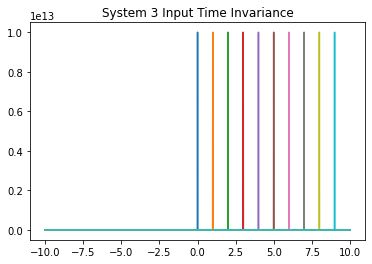

In [28]:
y3s = scaling(y3)
plt.figure()
plt.title("System 3 Output Scaling")
for i in range(RANGE):
    plt.plot(ytime, y3s[i])

y3si = scalingi(y3)
plt.figure()
plt.title("System 3 Input Scaling")
for i in range(RANGE):
    plt.plot(ytime, y3si[i])

y3t = time_invariance(y3)
plt.figure()
plt.title("System 3 Output Time Invariance")
for i in range(RANGE):
    plt.plot(ytime, y3t[i])

y3ti = time_invariancei(y3)
plt.figure()
plt.title("System 3 Input Time Invariance")
for i in range(RANGE):
    plt.plot(ytime, y3ti[i])

#causality test
if y3c(-1) == 0:
    print("System 3 is causal, y(-1) = 0 ")
else:
    print("System 3 is not causal")

<p>because the output and input scaling graphs match, system 3 is linear.</p>
<p>because the output and input time invariance graphs match, system 1 is time invariant</p>
<p>The system references future time indices for t < 1 therefore is non causal</p>
